<a href="https://colab.research.google.com/github/maruson08/ladderGame/blob/main/Ladder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Visulalize

시작할 점을 선택하세요(1 ~ 5): 3
1번에 도착한 횟수: 10192
2번에 도착한 횟수: 9897
3번에 도착한 횟수: 10153
4번에 도착한 횟수: 10030
5번에 도착한 횟수: 9728


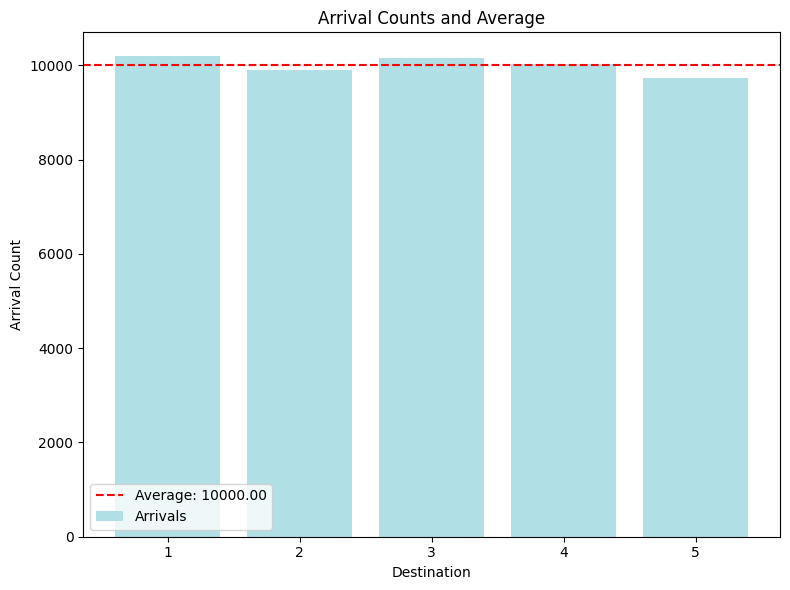

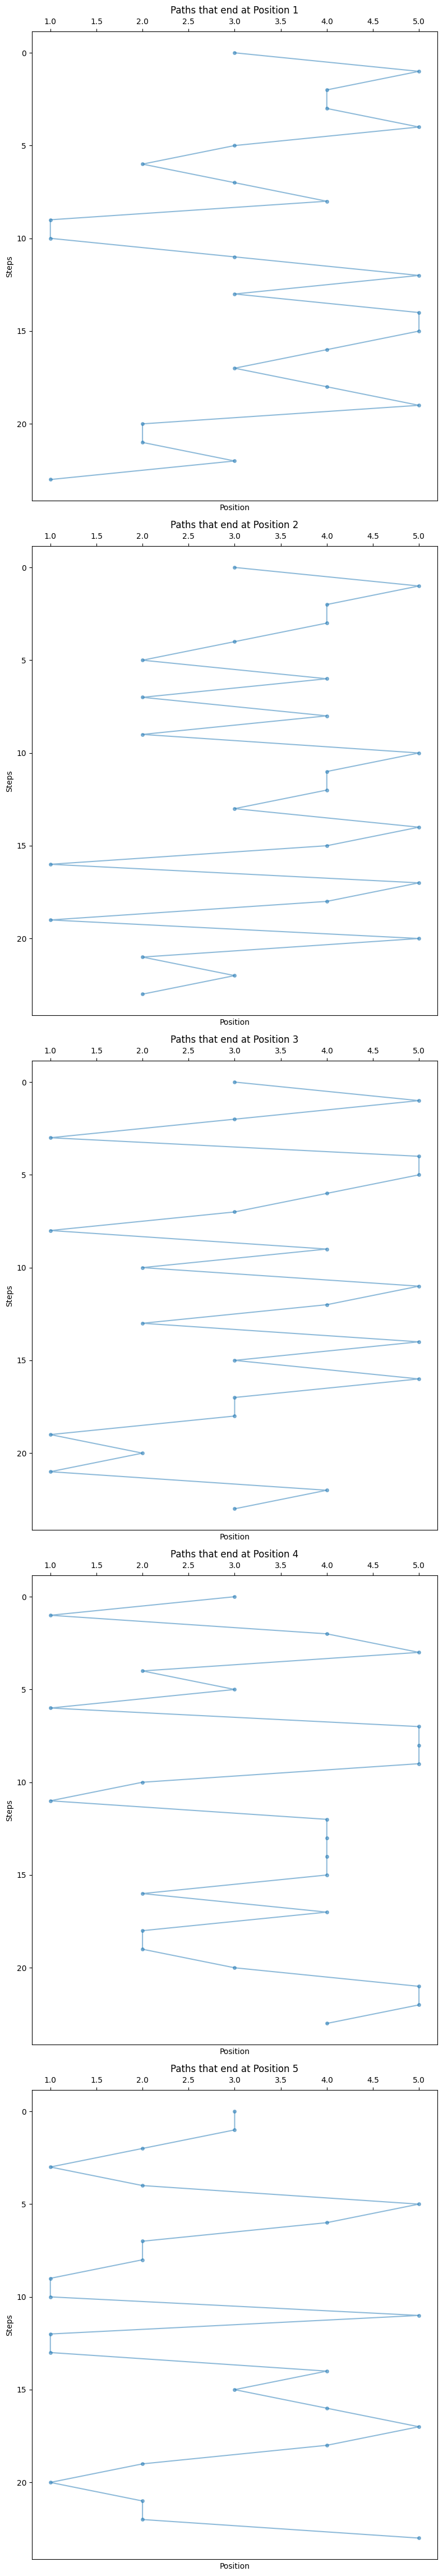

In [114]:
import random
import matplotlib.pyplot as plt

def _linearLadder(current, width):
    next = 0
    if current == 1:
        return 2
    elif current == width:
        return width - 1
    else:
        next = random.choice([-1, 0, 1])
        return current + next

def _roundLadder(current, width):
    next = 0
    if current == 1:
        return random.choice([2, width])
    elif current == width:
        return random.choice([1, width - 1])
    else:
        next = random.choice([-1, 0, 1])
        return current + next

def _roundLadderWithDiagonal(current, width):
    return random.choice([i + 1 for i in range(config['width'])])

def ladder(config, start):
    current = start
    positions = [current]
    for i in range(0, config['depth']):
        if config['ladder'] == 'linear':
            current = _linearLadder(current, config['width'])
            positions.append(current)
        elif config['ladder'] == 'round':
            current = _roundLadder(current, config['width'])
            positions.append(current)
        elif config['ladder'] == 'diagonal':
            current = _roundLadderWithDiagonal(current, config['width'])
            positions.append(current)

    return positions

def simulate_ladder(config):
    config['start'] = int(input(f'시작할 점을 선택하세요(1 ~ {config["width"]}): '))
    result = {i: 0 for i in range(1, config['width'] + 1)}
    all_positions = []

    for i in range(config['repeat']):
        positions = ladder(config, config['start'])
        final_pos = positions[-1]
        result[final_pos] += 1
        all_positions.append(positions)

    return result, all_positions

config = {
    'depth': 23,
    'width': 5,
    'repeat': 50000,
    'ladder': 'diagonal',
    'max_display_path': 1
}

result, all_positions = simulate_ladder(config)

for i in range(1, config['width'] + 1):
    if i in result:
        print(f'{i}번에 도착한 횟수: {result[i]}')
    else:
        print(f'{i}번에 도달하지 않았습니다.')

counts = [result.get(i, 0) for i in range(1, config['width'] + 1)]

average = sum(counts) / len(counts)

plt.figure(figsize=(8, 6))

plt.bar(range(1, config['width'] + 1), counts, color='powderblue', label='Arrivals')

plt.axhline(y=average, color='red', linestyle='--', label=f'Average: {average:.2f}')

plt.title('Arrival Counts and Average')
plt.xlabel('Destination')
plt.ylabel('Arrival Count')

plt.legend()

plt.tight_layout()
plt.show()


paths_by_destination = {i: [] for i in range(1, config['width'] + 1)}

for path in all_positions:
    final_pos = path[-1]
    paths_by_destination[final_pos].append(path)

fig, axes = plt.subplots(config['width'], 1, figsize=(8, 2 * config['depth']))

for final_pos in range(1, config['width'] + 1):
    ax = axes[final_pos - 1]
    ax.set_title(f'Paths that end at Position {final_pos}')

    for path in paths_by_destination[final_pos][:config['max_display_path']]:
        ax.plot(path, range(config['depth'] + 1), marker='o', markersize=4, alpha = 0.5)
    ax.xaxis.set_ticks_position('top')
    ax.invert_yaxis()
    ax.set_xlabel('Position')
    ax.set_ylabel('Steps')

plt.tight_layout()
plt.show()

# Animation

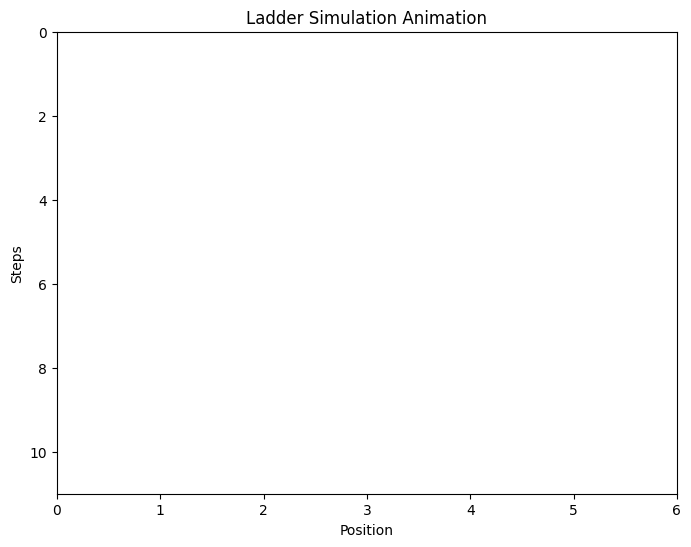

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def _linearLadder(current, width):
    next = 0
    if current == 1:
        return 2
    elif current == width:
        return width - 1
    else:
        while True:
            next = random.randint(-1, 1)
            if next != 0:
                break
        return current + next

def linearLadder(config, start):
    current = start
    positions = [current]
    for i in range(0, config['depth']):
        current = _linearLadder(current, config['width'])
        positions.append(current)

    return positions

def simulate_ladder(config):
    config['start'] = random.randint(1, config['width'])
    all_positions = []

    for i in range(config['repeat']):
        positions = linearLadder(config, config['start'])
        all_positions.append(positions)

    return all_positions

config = {
    'depth': 10,
    'width': 5,
    'repeat': 100,
}

all_positions = simulate_ladder(config)

def calculate_percentages(all_positions, config):
    result = {}

    for positions in all_positions:
        final_position = positions[-1]
        if final_position in result:
            result[final_position] += 1
        else:
            result[final_position] = 1

    percentages = {key: (count / config['repeat']) * 100 for key, count in result.items()}

    return percentages

percentages = calculate_percentages(all_positions, config)

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_xlim(0, config['width'] + 1)
ax.set_ylim(config['depth'] + 1, 0)
ax.set_xlabel('Position')
ax.set_ylabel('Steps')
ax.set_title('Ladder Simulation Animation')

lines = [ax.plot([], [], marker='o', markersize=4)[0] for _ in range(config['repeat'])]

def init():
    for line in lines:
        line.set_data([], [])
    return lines

def update(frame):
    ax.clear()

    ax.set_xlim(0, config['width'] + 1)
    ax.set_ylim(config['depth'] + 1, 0)
    ax.set_xlabel('Position')
    ax.set_ylabel('Steps')
    ax.set_title('Ladder Simulation Animation')

    for trial in range(frame + 1):
        positions = all_positions[trial]
        positions_at_current_frame = positions[:frame + 1]
        steps_at_current_frame = range(frame + 1)

        lines[trial].set_data(positions_at_current_frame, steps_at_current_frame)
        ax.add_line(lines[trial])

    return lines

ani = animation.FuncAnimation(
    fig, update, frames=config['depth'], init_func=init, interval=500, blit=False, repeat=False
)

plt.show()

print("\n### Final Destination Percentages ###")
for i in range(1, config['width'] + 1):
    if i in percentages:
        print(f"Position {i} reached with {percentages[i]:.2f}% probability.")
    else:
        print(f"Position {i} was not reached.")
